# Assignment: Trees
Do three questions.

**Q1.** Please answer the following questions in your own words.

1. How are trees constructed?

2. How do trees handle non-linear relationships between variables? Compare this to linear models. 

3. Why is the Gini a good loss function for categorical target variables? 

4. Why do trees tend to overfit, and how can this tendency be constrained? 

5. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates. 

6. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?

7. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?

1. How are trees constructed?

Trees are built by dividing the data into groups using certain features. This splitting keeps going until a rule tells it to stop. In the end, you get a tree where each step makes a decision based on the data.

2. How do trees handle non-linear relationships between variables? Compare this to linear models. 

Trees are good at handling non-linear relationships between variables because they split data based on specific values. Compared to linear models, they are able to handle non-linear patters better because they can handle complex relationships compared to just a straight line.

3. Why is the Gini a good loss function for categorical target variables? 

Gini is a good loss function for categorical target variables because it measures how mixed classes are in a group. Additionally, it is able to help the tree find splits that make groups primarily one category. This is important because it helps the tree make better decisions about how to split the data.

4. Why do trees tend to overfit, and how can this tendency be constrained?

Trees tend to overfit because they often keep splitting the data to perfectly match the training data. This can lead to overfitting because the tree may make groupings too small and specific to noise in the training data. To constrain this, you can stop splitting the data when groups get too small.

5. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates.

False because trees can work with both categorical and numerical variables. They are able to handle categorical variables easily by splitting directly based on categories. However, they also work with numerical variables by finding the best numbers to split at.

6. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?

Most versions of classification/regression trees don't allow for more than two branches a split because it keeps the tree simple and the same throughout. This two branch split makes it easier to compute and train than more branches.

7. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?

Some ways you can examine a tree to decide whether it is over/under-fitting is to see how complex a tree is. If it complex, does great on training, and bad on testing then it is most likely overfitting. If it is too simple and doesn't learn much from the data then it is most likely underfitting.


**Q2.** This is a case study on regression and classification trees.

1. Load `./data/cars_hw.csv`. How many observations and features/covariates/variables? What are the available variables? Take a look at the first few rows of data.

2. For the categorical variables `Make`, `Color`, `Body_type`, `No_of_Owners`, `Fuel_Type`, `Transmission`, and `Transmission_Type`, create dummy/one-hot-encoded representations. For numeric variables, we'll use `Mileage_Run`, `Make_Year`, and `Seating_Capacity`. Our target variable will be `Price`. Make a train-test split of your data.

3. From `sklearn.tree`, import the `DecisionTreeRegressor` and `plot_tree`. Use a train-test split to iterate over possible values for `min_samples_leaf`, computing the $R^2$ for each value between 1 and 25. What choice achieves the highest $R^2$ on the test data?

4. For the optimal `min_samples_leaf` from 3, regress price on the rest of the features/covariates using the training data. What is your $R^2$ and RMSE on the test set? Plot the dendrogram. Plot the residuals. Is the density of residuals symmetric and centered around 0?

5. Run a linear regression of price on the same variables. Which model -- regression tree or linear regression -- performs better on the test set? Why?

6. Predict prices using both your tree and your linear model, and make a scatter plot of their values. Describe what you see. 

1. Load `./data/cars_hw.csv`. How many observations and features/covariates/variables? What are the available variables? Take a look at the first few rows of data.

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [51]:
df = pd.read_csv("data/cars_hw.csv")
df = pd.DataFrame(df)

print(df.shape)
print(df.columns)
print(df.head())

(976, 12)
Index(['Unnamed: 0', 'Make', 'Make_Year', 'Color', 'Body_Type', 'Mileage_Run',
       'No_of_Owners', 'Seating_Capacity', 'Fuel_Type', 'Transmission',
       'Transmission_Type', 'Price'],
      dtype='object')
   Unnamed: 0        Make  Make_Year   Color  Body_Type  Mileage_Run  \
0           1  Volkswagen       2017  silver      sedan        44611   
1           2     Hyundai       2016     red  crossover        20305   
2           3       Honda       2019   white        suv        29540   
3           4     Renault       2017  bronze  hatchback        35680   
4           5     Hyundai       2017  orange  hatchback        25126   

  No_of_Owners  Seating_Capacity Fuel_Type Transmission Transmission_Type  \
0          1st                 5    diesel      7-Speed         Automatic   
1          1st                 5    petrol      5-Speed            Manual   
2          2nd                 5    petrol      5-Speed            Manual   
3          1st                 5    pe

2. For the categorical variables `Make`, `Color`, `Body_type`, `No_of_Owners`, `Fuel_Type`, `Transmission`, and `Transmission_Type`, create dummy/one-hot-encoded representations. For numeric variables, we'll use `Mileage_Run`, `Make_Year`, and `Seating_Capacity`. Our target variable will be `Price`. Make a train-test split of your data.

In [52]:
categorical_variables = ["Make", "Color", "Body_Type", "No_of_Owners", "Fuel_Type", "Transmission", "Transmission_Type"]
numeric_variables = ["Mileage_Run", "Make_Year", "Seating_Capacity"]
target = "Price"

df_dummies = pd.get_dummies(df[categorical_variables], drop_first=True)

df_numeric = df[numeric_variables]

X = pd.concat([df_dummies, df_numeric], axis=1)

y = df[target]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

3. From `sklearn.tree`, import the `DecisionTreeRegressor` and `plot_tree`. Use a train-test split to iterate over possible values for `min_samples_leaf`, computing the $R^2$ for each value between 1 and 25. What choice achieves the highest $R^2$ on the test data?

In [53]:
r2_scores = []

for leaf_size in range(1, 26):
    model = DecisionTreeRegressor(min_samples_leaf=leaf_size, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append((leaf_size, r2))

best_leaf, best_r2 = max(r2_scores, key=lambda x: x[1])

print("Best min_samples_leaf:", best_leaf)
print("Highest R2 on test data:", best_r2)

Best min_samples_leaf: 5
Highest R2 on test data: 0.8253410511223336


4. For the optimal `min_samples_leaf` from 3, regress price on the rest of the features/covariates using the training data. What is your $R^2$ and RMSE on the test set? Plot the dendrogram. Plot the residuals. Is the density of residuals symmetric and centered around 0?

R2 on test set: 0.8228418832488933
RMSE on test set: 142545.55655889618


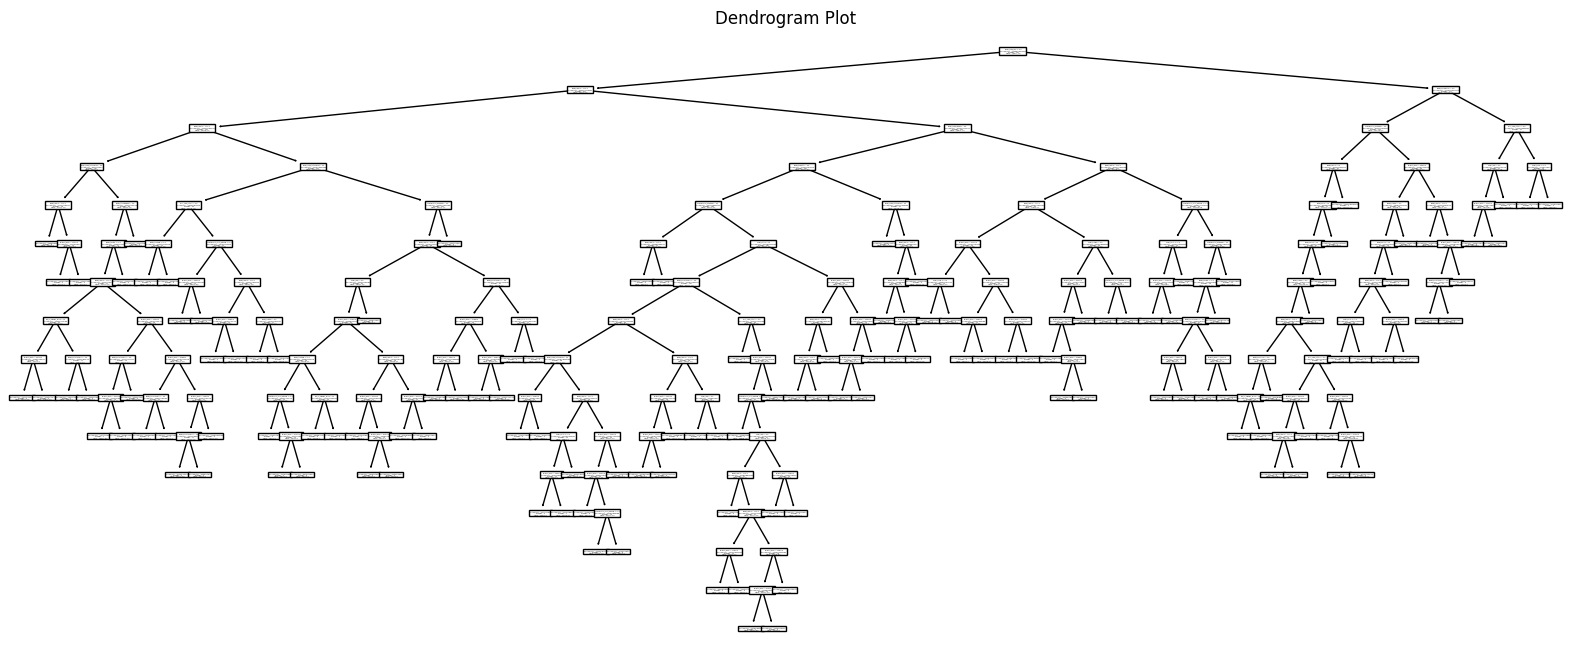

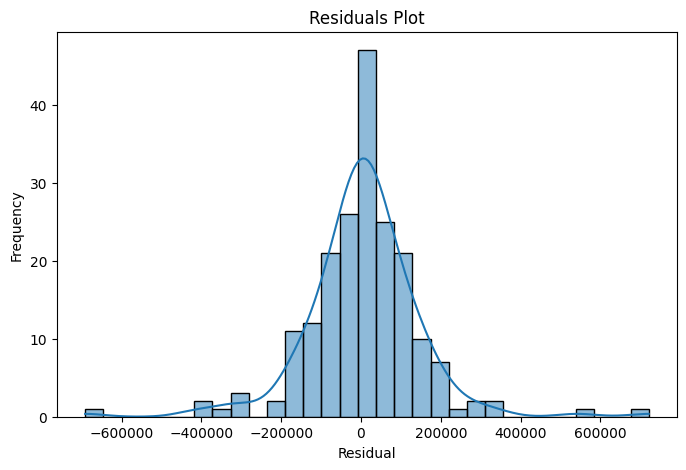

In [54]:
final_model = DecisionTreeRegressor(min_samples_leaf=5, random_state=19203)
final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("R2 on test set:", r2)
print("RMSE on test set:", rmse)

# Dendrogram plot
plt.figure(figsize=(20, 8))
plot_tree(final_model, feature_names=X.columns)
plt.title("Dendrogram Plot")
plt.show()

residuals = y_test - y_pred

# Residuals plot
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True)
plt.title("Residuals Plot")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

Yes, the density of residuals is symmetric and fairly centered around 0.

5. Run a linear regression of price on the same variables. Which model -- regression tree or linear regression -- performs better on the test set? Why?

In [55]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_lin = lin_reg.predict(X_test)
r2_lin = r2_score(y_test, y_pred_lin)
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))

print("Linear Regression R2:", r2_lin)
print("Linear Regression RMSE:", rmse_lin)

Linear Regression R2: 0.8202733305994228
Linear Regression RMSE: 143575.1966056897


The regression tree performs slightly better than the linear model with a R2 of 0.825 compared to 0.820. The improvement in the Tree model slightly performs better because it can handle non-linear relationships better.

6. Predict prices using both your tree and your linear model, and make a scatter plot of their values. Describe what you see.

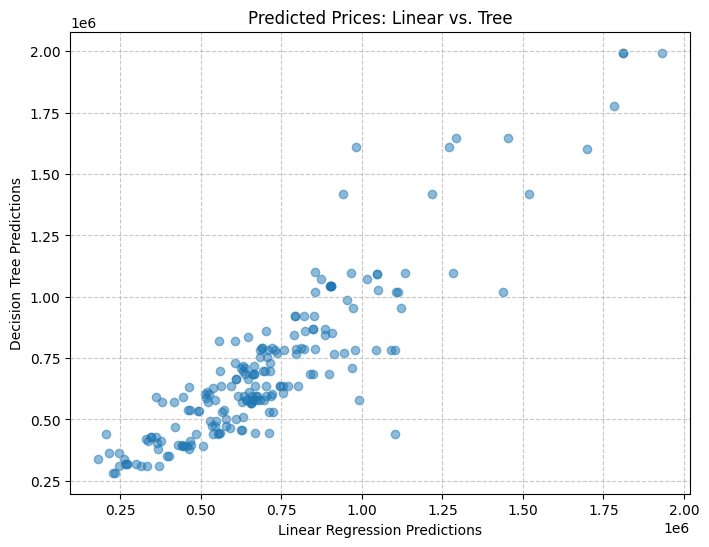

In [56]:
y_pred_tree = final_model.predict(X_test)
y_pred_lin = lin_reg.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_lin, y_pred_tree, alpha=0.5)
plt.xlabel("Linear Regression Predictions")
plt.ylabel("Decision Tree Predictions")
plt.title("Predicted Prices: Linear vs. Tree")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

The scatter plot shows that both models give relatively similar predictions for many cars. However, when prices go up, the tree model predics more extreme values than the linear model.

**Q3.** This is a case study about classification and regression trees.

1. Load the `Breast Cancer METABRIC.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include `Tumor Size`, `Lymph nodes examined positive`, `Age at Diagnosis`. For categorical variables, we'll include `Tumor Stage`, `Chemotherapy`, and `Cancer Type Detailed`. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, $X$.

3. Let's predict `Overall Survival Status` given the features/covariates $X$. There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy? 

4. For your model in part three, compute three statistics:
    - The **true positive rate** or **sensitivity**:
        $$
        TPR = \dfrac{TP}{TP+FN}
        $$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$
    Does your model tend to perform better with respect to one of these metrics?

5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the optimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

1. Load the `Breast Cancer METABRIC.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

In [57]:
df = pd.read_csv("data/Breast Cancer METABRIC.csv")
df = pd.DataFrame(df)
print(df.shape)
print(df.head(5))


(2509, 34)
  Patient ID  Age at Diagnosis Type of Breast Surgery    Cancer Type  \
0    MB-0000             75.65             Mastectomy  Breast Cancer   
1    MB-0002             43.19      Breast Conserving  Breast Cancer   
2    MB-0005             48.87             Mastectomy  Breast Cancer   
3    MB-0006             47.68             Mastectomy  Breast Cancer   
4    MB-0008             76.97             Mastectomy  Breast Cancer   

                        Cancer Type Detailed Cellularity Chemotherapy  \
0           Breast Invasive Ductal Carcinoma         NaN           No   
1           Breast Invasive Ductal Carcinoma        High           No   
2           Breast Invasive Ductal Carcinoma        High          Yes   
3  Breast Mixed Ductal and Lobular Carcinoma    Moderate          Yes   
4  Breast Mixed Ductal and Lobular Carcinoma        High          Yes   

  Pam50 + Claudin-low subtype  Cohort ER status measured by IHC  ...  \
0                 claudin-low     1.0        

2.  We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include `Tumor Size`, `Lymph nodes examined positive`, `Age at Diagnosis`. For categorical variables, we'll include `Tumor Stage`, `Chemotherapy`, and `Cancer Type Detailed`. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, $X$.

In [58]:
numeric_vars = ['Tumor Size', 'Lymph nodes examined positive', 'Age at Diagnosis']
categorical_vars = ['Tumor Stage', 'Chemotherapy', 'Cancer Type Detailed']

df_cat = pd.get_dummies(df[categorical_vars], drop_first=True)

df_num = df[numeric_vars]
X = pd.concat([df_num, df_cat], axis=1)

3. Let's predict `Overall Survival Status` given the features/covariates $X$. There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy? 

Accuracy: 0.5994962216624685


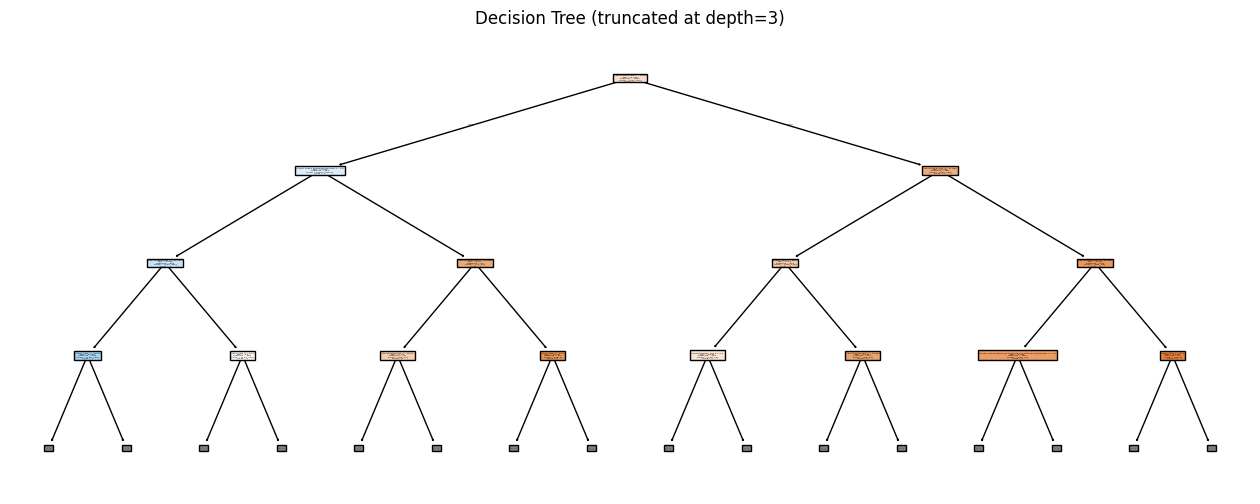

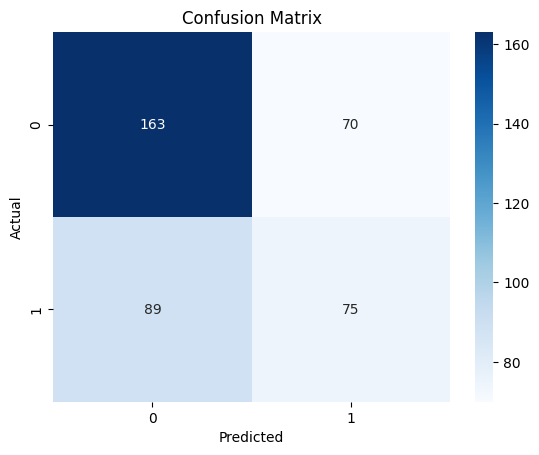

In [61]:
df_clean = df.dropna(subset=['Overall Survival Status'])

X_clean = X.loc[df_clean.index]
y = df_clean['Overall Survival Status']

X_train, X_test, y_train, y_test = train_test_split(X_clean, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(min_samples_leaf=10, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", acc)

plt.figure(figsize=(16, 6))
plot_tree(clf, feature_names=X.columns, class_names=["0", "1"], filled=True, max_depth=3)
plt.title("Decision Tree (truncated at depth=3)")
plt.show()

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


The accuracy is 0.599.

4. For your model in part three, compute three statistics:
    - The **true positive rate** or **sensitivity**:
        $$
        TPR = \dfrac{TP}{TP+FN}
        $$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$
    Does your model tend to perform better with respect to one of these metrics?

In [64]:
tn, fp, fn, tp = cm.ravel()

tpr = tp / (tp + fn)
tnr = tn / (tn + fp)

print("True Positive Rate:", tpr)
print("True Negative Rate:", tnr)

True Positive Rate: 0.4573170731707317
True Negative Rate: 0.6995708154506438


The model performs better in terms of specificity.

5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the optimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

Best min_samples_leaf: 122
Best R2 on test set: 0.13390305753036313


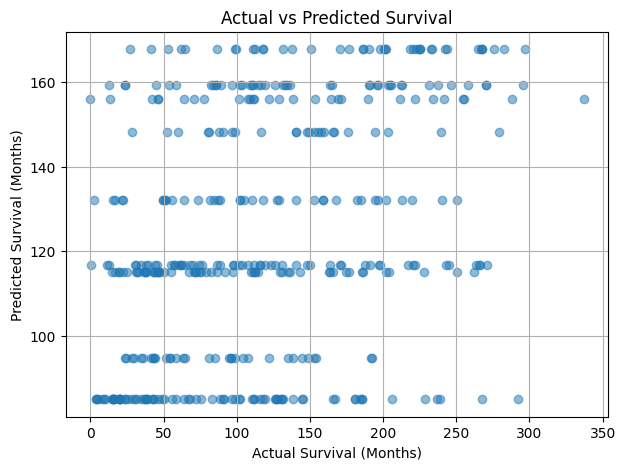

In [68]:
df_reg = df.dropna(subset=['Overall Survival (Months)'])

X_reg = X.loc[df_reg.index]
y_reg = df_reg['Overall Survival (Months)']

X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

r2_scores = []

for leaf in range(1, 150):
    model = DecisionTreeRegressor(min_samples_leaf=leaf, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append((leaf, r2))

best_leaf, best_r2 = max(r2_scores, key=lambda x: x[1])
print("Best min_samples_leaf:", best_leaf)
print("Best R2 on test set:", best_r2)

final_model = DecisionTreeRegressor(min_samples_leaf=best_leaf, random_state=42)
final_model.fit(X_train, y_train)
y_pred_final = final_model.predict(X_test)

plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred_final, alpha=0.5)
plt.xlabel("Actual Survival (Months)")
plt.ylabel("Predicted Survival (Months)")
plt.title("Actual vs Predicted Survival")
plt.grid(True)
plt.show()


The R2 is 0.1339 which shows that this model does not really perform that well in predicting the overall survival months. The plot shows that the model does not do a good job of predicting the values. I would not feel comfortable using this model for clinical purposes.


**Q4.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$. 

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

**Q5.** This is a case study about detecting fraud using classification trees. The goal is to predict the `class` variable, which is 0 for non-fraud and 1 for fraud.

1. Open `./data/creditcard_fraud.csv`. Print the number of observations and variables, and look at the first few rows of data. The variables are already normalized and de-identified, and are just called things like `V8` to protect the privacy of the clients.

2. Print a table of counts for the `class` variable and make a histogram. What percentage of transactions are fraudulent?

3. Drop `Time` and make a decision tree classifier to predict fraud. Print a confusion table and compute the accuracy. This is a serious **class imbalance** problem: The minority class is so small that essentially predicting 0's for all cases will achieve an extremely high accuracy. There are over-sampling techniques to deal with this issue, but we don't have time to cover them in class.

4. Imagine that you block every transaction in the test set labelled as fraudulent. How much money is (1) saved that should be saved, (2) lost to fraud anyway, (3) withheld in error from customers? Does implementing this anti-fraud system seem like a good idea, or not? Why?

5. Instead of predicting fraud, predict loss: Multiple the `Class` variable times the `Amount` variable, and call it `Loss`. Predict it using a decision tree regressor (making sure to drop Class, Time, and Loss from the features/covariates/predictors). What $R^2$ and RMSE do you get? Make a scatterplot of the predicted values on the test group versus the actual test values. Do you notice any interesting patterns? How could you use this algorithm to decide which transactions to block, and why?


**Q6.** Show that any decision tree is equivalent to a linear regression on a set of dummy variables that represent the optimal splits in the tree. 

Hint: You can think of CART as partitioning the feature space into a set of sets $\{S_1, S_2, ..., S_K\}$, and then predicting the average for all of the observations in each set $S_k$, $m_k$:
$$
\hat{y}(x) = \sum_{k=1}^K \mathbb{I}\{ x \text{ is in } S_k \} m_k
$$
where $\mathbb{I} \{ P(x,k)\}$ takes the value 1 if the proposition $P(x,k)$ is true and 0 otherwise. Now, doesn't that look like least-squares regression on a set of dummy/one-hot-encoded variables?

Conversely, can any linear regression be represented by a tree?